#**IBM NLU Demo**
###The following code snippets can be found at https://cloud.ibm.com/apidocs/natural-language-understanding?code=python#features-examples

##**Import IBM NLU API**

In [ ]:
!pip install --upgrade "ibm-watson>=4.2.1"

     |████████████████████████████████| 413 kB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 138 kB 53.8 MB/s 
ERROR: Operation cancelled by user


In [ ]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, ClassificationsOptions, ConceptsOptions, EmotionOptions, \
EntitiesOptions, KeywordsOptions, RelationsOptions, SemanticRolesOptions, SentimentOptions, SyntaxOptions, SyntaxOptionsTokens

authenticator = IAMAuthenticator('hzQviQPuTzZXbVrXp5BLRb3qLn4PkGhuJq0XM0UUSD0t')
natural_language_understanding = NaturalLanguageUnderstandingV1(version='2021-08-01', authenticator=authenticator)

natural_language_understanding.set_service_url('https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/b8ba28f5-ecdb-4a85-bbca-cccb8cffe764')

ModuleNotFoundError: ignored

##**Get the dataset**
###The dataset is obtained from Kaggle: https://www.kaggle.com/madhavmalhotra/journal-entries-with-labelled-emotions

In [ ]:
# Mount Google Drive to get the dataset
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
# Store the dataset as a dataframe
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/journal_entries.csv")

In [ ]:
# See the shape of the dataset
print("The shape of the dataframe is (row, column): %s \n" % str(df.shape))

The shape of the dataframe is (row, column): (1473, 30) 



In [ ]:
# See the first 3 rows of the dataframe
print("The first 3 rows of the dataframe:\n")
df.head(3)

The first 3 rows of the dataframe:



,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


##**Trim the dataset**

In [ ]:
# We will use only the first column for now
journal_df = pd.DataFrame(data=df['Answer'].values, columns=['Entry'])

print("The first 3 rows of the new, trimmed dataframe:\n")
journal_df.head(3)

The first 3 rows of the new, trimmed dataframe:



,Entry
0,"My family was the most salient part of my day,..."
1,Yoga keeps me focused. I am able to take some ...
2,"Yesterday, my family and I played a bunch of b..."


##**1. Categories**
###Returns a hierarchical taxonomy of the content. For example, a news website may return categories like international news or arts and entertainment. The top three categories are returned by default.

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(text=journal_df['Entry'][i], features=Features(categories=CategoriesOptions(limit=3))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "categories": [
    {
      "score": 0.998884,
      "label": "/health and fitness/disorders/mental disorder/panic and anxiety"
    },
    {
      "score": 0.964367,
      "label": "/family and parenting/children"
    }
  ]
}


~~~~~Journal entry 1 ~~~~~: 
Text: Yoga keeps me focused. I am able to take some time for me and breath and work my body. This is important because it sets up my mood for the whole day.

{
  "usage": {
    "text_units": 1,
    "text_character

##**2. Classifications**
###Classifies input using custom multi-label text classifier. For example, a a custom weather classifier may return classifications such as "temperature" or "condition".

###IBM offers many classification options. In this demo, we will use the "Tone analytics" classification option.

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(classifications=ClassificationsOptions(model='tone-classifications-en-v1'))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "classifications": [
    {
      "confidence": 0.420729,
      "class_name": "sad"
    },
    {
      "confidence": 0.160836,
      "class_name": "excited"
    },
    {
      "confidence": 0.093834,
      "class_name": "polite"
    },
    {
      "confidence": 0.060934,
      "class_name": "satisfied"
    },
    {
      "confidence": 0.05253,
      "class_name": "frustrated"
    },
    {
      "confidence": 0.023222,
      "class_name": "sympathetic"
    },
    {
  

##**3. Concepts**
###Returns high-level concepts in the content. For example, a research paper about deep learning might return the concept, "Artificial Intelligence" although the term is not mentioned.


In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(concepts=ConceptsOptions(limit=3))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "concepts": [
    {
      "text": "Child",
      "relevance": 0.9044,
      "dbpedia_resource": "http://dbpedia.org/resource/Child"
    }
  ]
}


~~~~~Journal entry 1 ~~~~~: 
Text: Yoga keeps me focused. I am able to take some time for me and breath and work my body. This is important because it sets up my mood for the whole day.

{
  "usage": {
    "text_units": 1,
    "text_characters": 150,
    "features": 1
  },
  "language": "en",
  "concepts": [
    {
      "t

##**4. Emotion**
###Detects anger, disgust, fear, joy, or sadness that is conveyed in the content or by the context around target phrases specified in the targets parameter. You can analyze emotion for detected entities with entities.emotion and for keywords with keywords.emotion.

###In this demo, no target words are specified. Therefore, only the emotion of the whole document (journal entry) is found.


In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(emotion=EmotionOptions())).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "emotion": {
    "document": {
      "emotion": {
        "sadness": 0.320519,
        "joy": 0.300227,
        "fear": 0.09746,
        "disgust": 0.006462,
        "anger": 0.015856
      }
    }
  }
}


~~~~~Journal entry 1 ~~~~~: 
Text: Yoga keeps me focused. I am able to take some time for me and breath and work my body. This is important because it sets up my mood for the whole day.

{
  "usage": {
    "text_units": 1,
    "text_characters": 150,
    "features

##**5. Entities**
###Identifies people, cities, organizations, and other entities in the content. 

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(entities=EntitiesOptions(sentiment=True, emotion=True))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "entities": []
}


~~~~~Journal entry 1 ~~~~~: 
Text: Yoga keeps me focused. I am able to take some time for me and breath and work my body. This is important because it sets up my mood for the whole day.

{
  "usage": {
    "text_units": 1,
    "text_characters": 150,
    "features": 1
  },
  "language": "en",
  "entities": []
}


~~~~~Journal entry 2 ~~~~~: 
Text: Yesterday, my family and I played a bunch of board games. My husband won most of them which is not su

##**6. Keywords**
###Returns important keywords in the content. For example, analyzing a company's press release could return keywords such as "sustainability", "hybrid cloud", or "IBM". 

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(keywords=KeywordsOptions(sentiment=True,emotion=True,limit=2))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "language": "en",
  "keywords": [
    {
      "text": "salient part of my day",
      "sentiment": {
        "score": -0.448632,
        "label": "negative"
      },
      "relevance": 0.89995,
      "emotion": {
        "sadness": 0.55411,
        "joy": 0.325104,
        "fear": 0.018568,
        "disgust": 0.009825,
        "anger": 0.020952
      },
      "count": 1
    },
    {
      "text": "much attention",
      "sentiment": {
        "score": 0.707453,
        "label": "positi

##**7. Metadata**
###Returns information from the document, including author name, title, RSS/ATOM feeds, prominent page image, and publication date. Supports URL and HTML input types only. 

##**8. Relations**
###Recognizes when two entities are related and identifies the type of relation. For example, an awardedTo relation might connect the entities "Nobel Prize" and "Albert Einstein".

###List of relations for English: https://cloud.ibm.com/docs/natural-language-understanding?topic=natural-language-understanding-relation-types-version-1

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(relations=RelationsOptions())).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "relations": [
    {
      "type": "relative",
      "sentence": "My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time.",
      "score": 0.309066,
      "arguments": [
        {
          "text": "My",
          "location": [
            0,
            2
          ],
          "entities": [
            {
              "type": "Person",
              "text": "My"
            }
          ]
        },
        {
         

##**9. Semantic Roles**
###Parses sentences into subject, action, and object form.

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(semantic_roles=SemanticRolesOptions())).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "semantic_roles": [
    {
      "subject": {
        "text": "My family"
      },
      "sentence": "My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time.",
      "object": {
        "text": "the most salient part of my day"
      },
      "action": {
        "verb": {
          "text": "be",
          "tense": "past"
        },
        "text": "was",
        "normalized": "be"
      }
    },
    {
      "subject": {


##**10. Sentiment**
###Analyzes the general sentiment of your content or the sentiment toward specific target phrases. As an example, the phrase "Thank you and have a nice day!" returns a positive sentiment (score .91). You can analyze sentiment for detected entities with entities.sentiment and for keywords with keywords.sentiment .

###Note: The sentiment score goes from -1 (negative) to 1 (positive).

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(sentiment=SentimentOptions())).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": 0.577171,
      "label": "positive"
    }
  },
  "language": "en"
}


~~~~~Journal entry 1 ~~~~~: 
Text: Yoga keeps me focused. I am able to take some time for me and breath and work my body. This is important because it sets up my mood for the whole day.

{
  "usage": {
    "text_units": 1,
    "text_characters": 150,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": 0.975569,
      "label": "positive"
    }
  },
 

##**11. Syntax**
###Returns information about the tokens and sentences in the input text. At least one of syntax.tokens or syntax.sentences must be specified.

In [ ]:
for i in range(3):
  print("~~~~~Journal entry %d ~~~~~: " % i)
  print("Text: %s\n" % journal_df['Entry'][i])
  response = natural_language_understanding.analyze(
    text=journal_df['Entry'][i],
    features=Features(
      syntax=SyntaxOptions(
        sentences=True,
        tokens=SyntaxOptionsTokens(
          lemma=True,
          part_of_speech=True,
        )))).get_result()
  print(json.dumps(response, indent=2))
  print("\n")

~~~~~Journal entry 0 ~~~~~: 
Text: My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.

{
  "usage": {
    "text_units": 1,
    "text_characters": 384,
    "features": 1
  },
  "syntax": {
    "tokens": [
      {
        "text": "My",
        "part_of_speech": "PRON",
        "location": [
          0,
          2
        ],
        "lemma": "my"
      },
      {
        "text": "family",
        "part_of_speech": "NOUN",
        "location": [
          3,
          9
        ],
        "lemma": "family"
      },
      {
        "text": "was",
        "part_of_speech": "AUX",
        "location": [
          10,
          13
        ],
        "lemma": "be"
  

##**Performance test**


###**Time**
###Perform categories, emotion, keywords, and sentiment analysis on the first 50 journal entries

In [ ]:
# Get only the first 50 entries
top_50_journal_df = journal_df.head(50)

In [ ]:
def analyze_text(text):
  response = natural_language_understanding.analyze(text=text, \
                                                    features=Features(categories=CategoriesOptions(limit=3),\
                                                                      emotion=EmotionOptions(),\
                                                                      keywords=KeywordsOptions(sentiment=True,emotion=True,limit=2),\
                                                                      sentiment=SentimentOptions()))\
                                                    .get_result()

  categories_output = json.dumps(response['categories'], indent=2)
  emotion_output = json.dumps(response['emotion']['document'], indent=2)
  keywords_output = json.dumps(response['keywords'], indent=2)
  sentiment_output = json.dumps(response['sentiment']['document'], indent=2)

  return({'Categories':categories_output, 'Emotion':emotion_output,'Keywords':keywords_output, 'Sentiment':sentiment_output})

In [ ]:
# See the time it takes to analyze 1 journal entry
%%time
%%capture
analyze_text(top_50_journal_df['Entry'][10])

CPU times: user 7.9 ms, sys: 1.1 ms, total: 9 ms
Wall time: 353 ms


In [ ]:
# See the time it takes to analyze 50 journal entries
%%time
%%capture
analysis_results = top_50_journal_df['Entry'].apply(analyze_text)

CPU times: user 311 ms, sys: 28.8 ms, total: 340 ms
Wall time: 19.5 s


###**Short texts**

In [ ]:
sample_text = "I just want to sleep."

results = analyze_text(sample_text)

print("Categories: ", results['Categories'], "\n")
print("Emotion: ", results['Emotion'], "\n")
print("Keywords: ", results['Keywords'], "\n")
print("Sentiment: ", results['Sentiment'])

Categories:  [
  {
    "score": 0.999197,
    "label": "/health and fitness/disorders/sleep disorders"
  }
] 

Emotion:  {
  "emotion": {
    "sadness": 0.306787,
    "joy": 0.125633,
    "fear": 0.269783,
    "disgust": 0.014026,
    "anger": 0.042334
  }
} 

Keywords:  [] 

Sentiment:  {
  "score": 0,
  "label": "neutral"
}


##**Summary**
###Pros
* Relatively cheap
* First 30K items per month are free
* Various features (11 are shown here)
* Confidence scores
* Detailed results (e.g. links to corresponding DBpedia resources, multiple emotions)
* Can return sentiment separately for each detected entity, keyword
* Can pre-define target phrases/words in a sentence and apply analysis specific to the target phrases/words
* Can determine relations between words
* Can identify categories, concepts
* Perform okay with short texts
* Supports 13 languages. However, some features are not yet available for particular languages.
* Easy to implement, lots of documentations to refer to

###Cons
* Slow (Maybe my code is very badly written, Google Colab CPU is not powerful?)
* Too detailed for what we need? (Maybe there are options to specify that we do not want the full results etc. to save time.

Reference: https://activewizards.com/blog/comparison-of-the-most-useful-text-processing-apis/

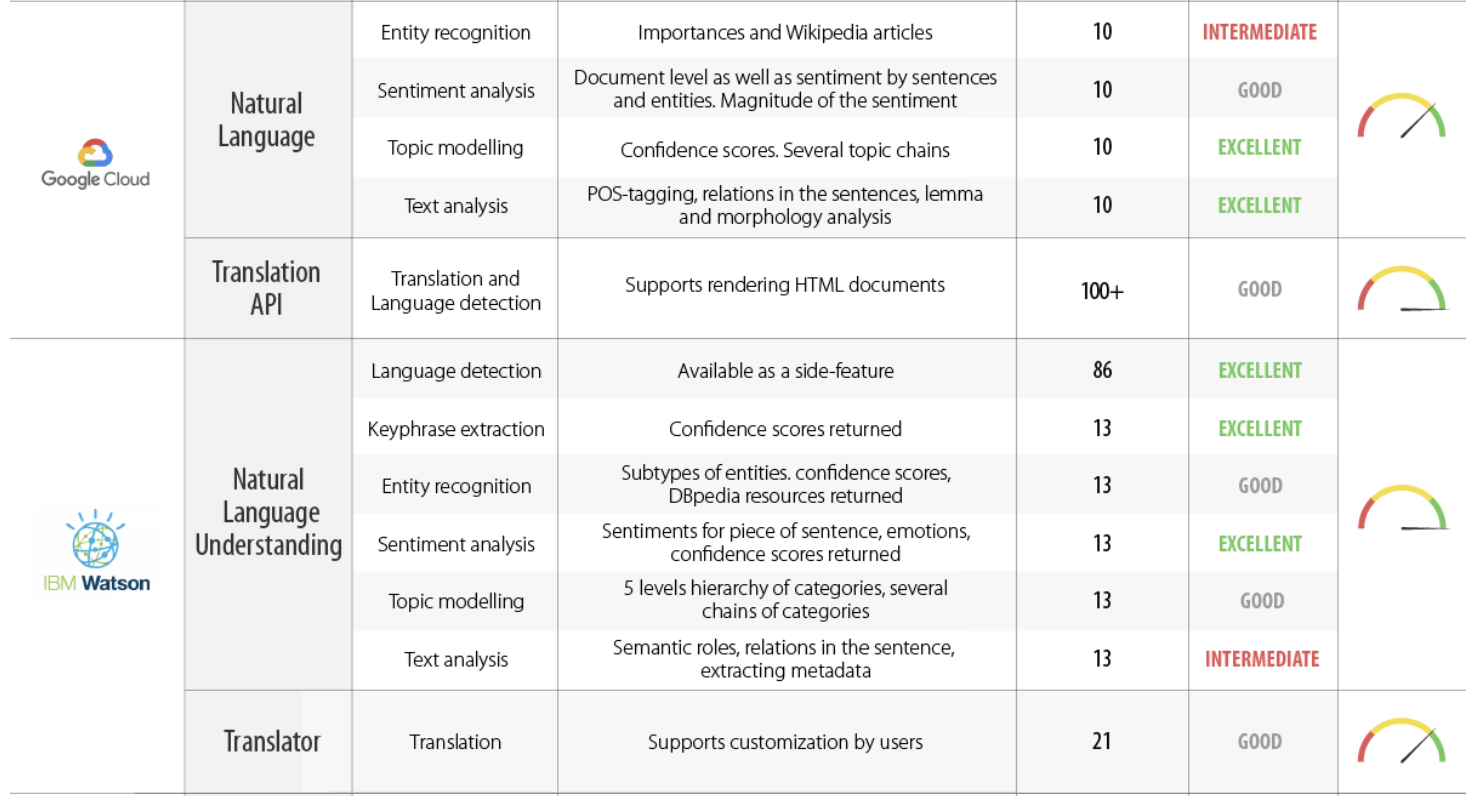

Reference: https://medium.com/kontikilabs/comparing-machine-learning-ml-services-from-various-cloud-ml-service-providers-63c8a2626cb6

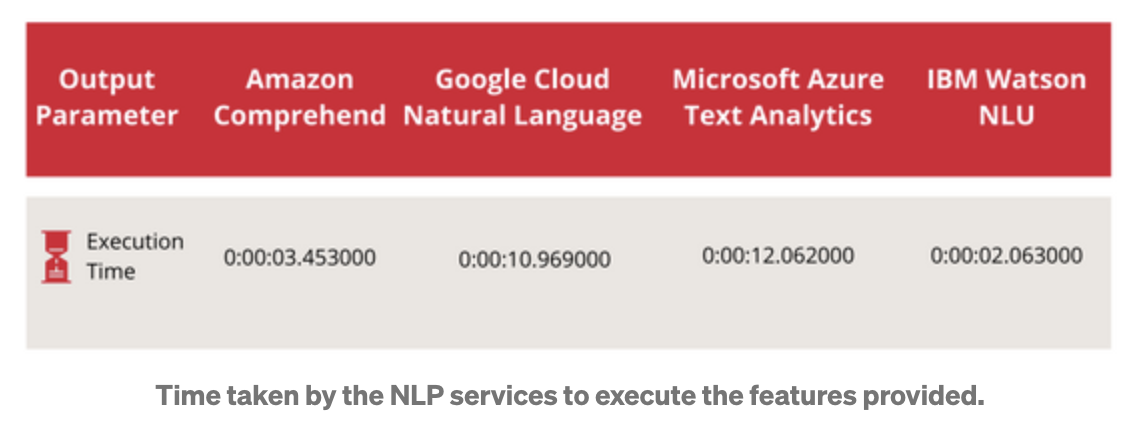